# Name : Pavithree Shetty
# Matriculation number : 220200661

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Getting the response from wikipedia server
page = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents")
soup = BeautifulSoup(page.content,"html.parser")


In [3]:
#Writing the page_content to a file  
out = open("wikiCountries_html","w",encoding="utf-8")
out.write(str(soup))
out.close()

In [4]:
#printing the title of the page
soup = BeautifulSoup(open("wikiCountries_html",encoding="utf-8"),"html.parser")
title = soup.find('title').get_text()
print(title.strip())

List of countries by continents - Simple English Wikipedia, the free encyclopedia


In [5]:
#continents[] : list of all continents

headers = soup.find_all('h2')
continents = []
for item in headers:
    continents.append(item.get_text().strip().split('[')[0])
continents.remove('Contents')
continents.remove('Antarctica')
del continents[-3:]
print(continents)

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Australia/Oceania']


In [6]:
#dict_countryContinent : Dictionary consisting of continents as keys and its set of contries as list of values

dict_countryContinent = {}
ordered_list = soup.find_all('ol')

countiCounter = 0
for conti in continents:
    countryASubList = (ordered_list[countiCounter].get_text().strip().split("\n"))
    dict_countryContinent[conti] = countryASubList
    countiCounter = countiCounter + 1
        
print(dict_countryContinent)

{'Africa': ['Algeria - Algiers', 'Angola - Luanda', 'Benin - Porto Novo, Cotonou', 'Botswana - Gaborone', 'Burkina Faso - Ouagadougou', 'Burundi - Gitega', 'Cameroon (also spelled Cameroun) - Yaoundé', 'Cape Verde - Praia', 'Central African Republic - Bangui', "Chad (Tchad) - N'Djamena", 'Comoros - Moroni', 'Republic of the Congo - Brazzaville', 'Democratic Republic of the Congo (Zaire) - Kinshasa', "Côte d'Ivoire (Ivory Coast) - Yamoussoukro", 'Djibouti - Djibouti', 'Egypt (Misr) - Cairo', 'Equatorial Guinea - Malabo', 'Eritrea - Asmara', 'Ethiopia (Abyssinia) - Addis Ababa', 'Gabon - Libreville', 'The Gambia - Banjul', 'Ghana - Accra', 'Guinea - Conakry', 'Guinea-Bissau - Bissau', 'Kenya - Nairobi', 'Lesotho - Maseru', 'Liberia - Monrovia', 'Libya - Tripoli', 'Madagascar - Antananarivo', 'Malawi - Lilongwe', 'Mali - Bamako', 'Mauritania - Nouakchott', 'Mauritius - Port Louis', 'Morocco (Al Maghrib) - Rabat', 'Mozambique - Maputo', 'Namibia - Windhoek', 'Niger - Niamey', 'Nigeria - Ab

In [7]:
#df     : Creating a dataframe from dict_countryContinent
#new_df : stacking all the countries into a single column - country or region

df = pd.DataFrame.from_dict(dict_countryContinent, orient='index')
new_df = df.stack().reset_index(level=1, drop=True).to_frame(name='Country or region')
new_df.reset_index(inplace=True)
new_df = new_df.rename(columns = {'index':'Continents'})
new_df

,Continents,Country or region
0,Africa,Algeria - Algiers
1,Africa,Angola - Luanda
2,Africa,"Benin - Porto Novo, Cotonou"
3,Africa,Botswana - Gaborone
4,Africa,Burkina Faso - Ouagadougou
...,...,...
221,Australia/Oceania,Samoa - Apia
222,Australia/Oceania,Solomon Islands - Honiara
223,Australia/Oceania,Tonga - Nuku'alofa
224,Australia/Oceania,Tuvalu - Funafuti


In [8]:
#data_preprocess(country) : removing capital cities and alternative name of the country using split()
def data_preprocess(country):
    var= (country.split("-")[0]).split("(")[0].strip()
    return var

In [9]:
#applying data_preprocess(country) to each country 
new_df['Country or region'] = new_df['Country or region'].apply(data_preprocess)
new_df

,Continents,Country or region
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso
...,...,...
221,Australia/Oceania,Samoa
222,Australia/Oceania,Solomon Islands
223,Australia/Oceania,Tonga
224,Australia/Oceania,Tuvalu


In [10]:
#getting the web response
page_score = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report")
soup_score = BeautifulSoup(page_score.content,'lxml')

out = open("wikiCountriesScore_html","w",encoding="utf-8")
out.write(str(soup_score))
out.close()

soup = BeautifulSoup(open("wikiCountriesScore_html",encoding="utf-8"),"lxml")

title = soup_score.find('title').get_text()
print(title.strip())

World Happiness Report - Wikipedia


In [11]:
#extracting the table and converting it to a dataframe
#df_scoreDataframe : Dataframe consisting of table pf 2019 happiness scores

table = soup.find_all('table',attrs={'class':'wikitable sortable'})
df_score = pd.read_html(str(table))
df_scoreDataframe = pd.DataFrame(df_score[0])
df_scoreDataframe['Country or region'].apply(lambda var : var.strip())
df_scoreDataframe


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [14]:
#Merging the two dataframes and eliminating duplicates and saving it as csv file

df_out = df_scoreDataframe.merge(new_df,on="Country or region",how="left")
df_out = df_out.drop_duplicates(subset='Country or region', keep="first")
df_out.to_csv ('Happiness_index.csv', index = False, header=True)
df_out

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,NaN
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe
...,...,...,...,...,...,...,...,...,...,...
155,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Africa
156,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Africa
157,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Asia
158,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Africa


In [15]:
#load csv file
df_final = pd.read_csv('Happiness_index.csv')
df_final 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,NaN
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Africa


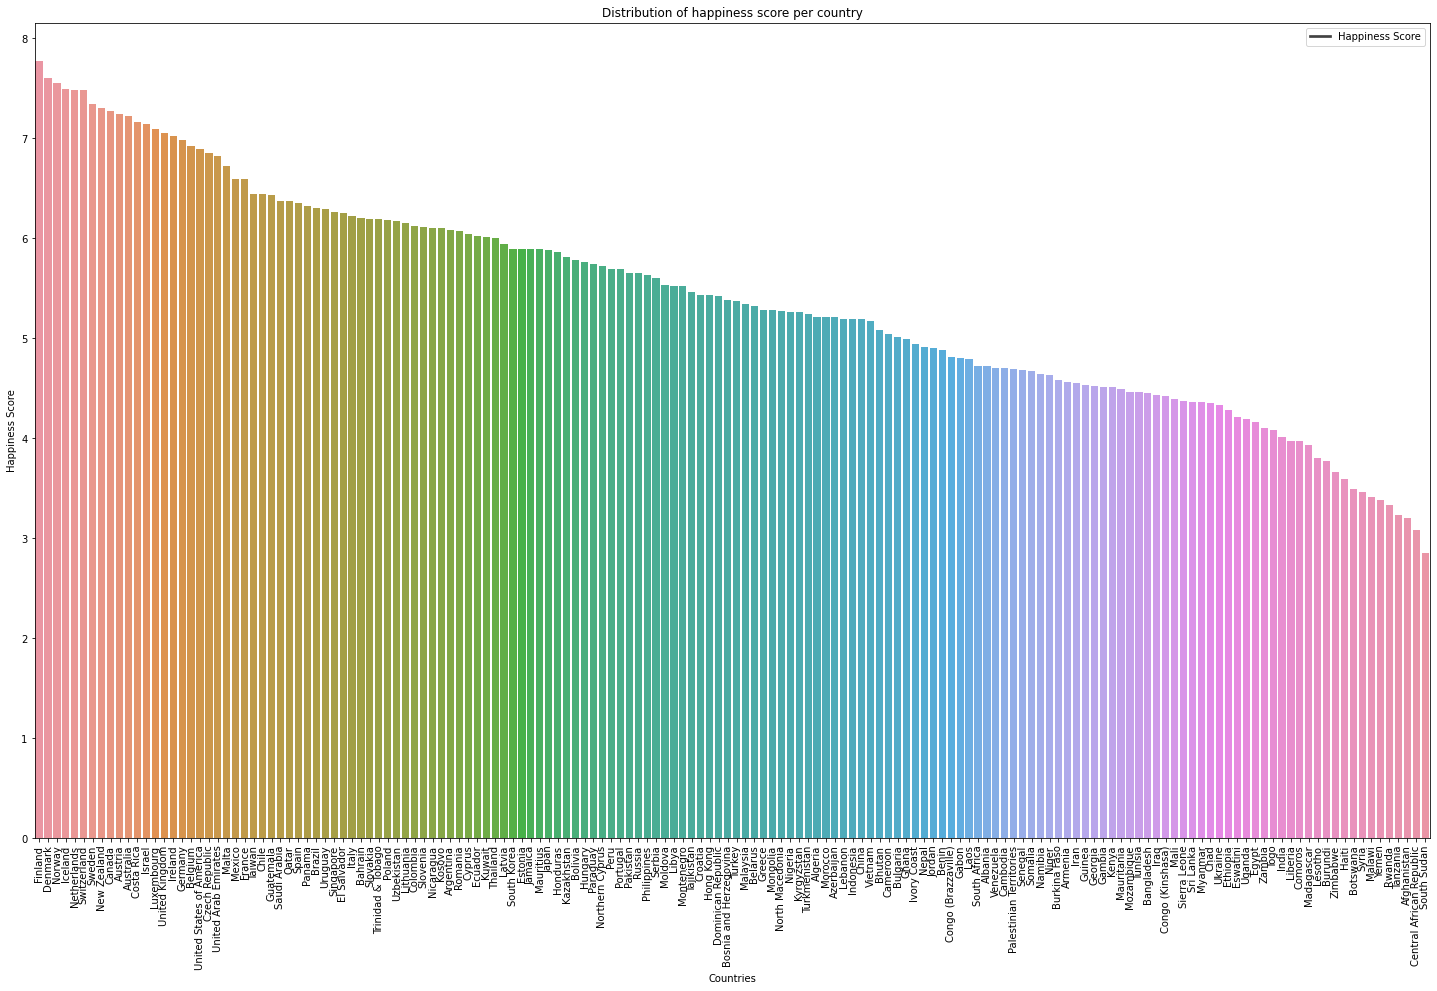

In [16]:
#Plot the distribution of happiness score per country
plt.figure(figsize=(25,15))
sns.barplot(x=df_final['Country or region'], y=df_final['Score'])
plt.xlabel("Countries")
plt.ylabel("Happiness Score")
plt.title("Distribution of happiness score per country")
plt.xticks(rotation=90)
plt.legend(labels=['Happiness Score'])

In [17]:
#Representing the countries with their happiness score projected on the world map
#By placing the cursor on the country we get its corresponding Happiness Score
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
            autocolorscale = True,
            reversescale = True,
           locations = df_final['Country or region'],
           locationmode = 'country names',
           z = df_final['Score'], 
           text = df_final['Country or region'],
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Global Happiness Score', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))


colormap = go.Figure(data = [data], layout=layout)
iplot(colormap)

In [18]:
#Find 10 least happy countries.
print("Ten least happy countries are as follows:")
print(df_final['Country or region'].tail(10).to_string(index=False))

Ten least happy countries are as follows:
                    Haiti
                 Botswana
                    Syria
                   Malawi
                    Yemen
                   Rwanda
                 Tanzania
              Afghanistan
 Central African Republic
              South Sudan


In [19]:
#What is the average of happiness?
print("The average of happiness is {}".format(df_final['Score'].mean()))

The average of happiness is 5.4070320512820516


In [20]:
#What are the countries above the median?
print("The median of happiness score is")
median = df_final['Score'].median()
print(median)
itr = 0
print("Countries above median of happiness score are as follows:")
for item in df_final['Score']:
    if item > median:
        print(df_final['Country or region'][itr])
    itr = itr +1  

The median of happiness score is
5.379499999999999
Countries above median of happiness score are as follows:
Finland
Denmark
Norway
Iceland
Netherlands
Switzerland
Sweden
New Zealand
Canada
Austria
Australia
Costa Rica
Israel
Luxembourg
United Kingdom
Ireland
Germany
Belgium
United States of America
Czech Republic
United Arab Emirates
Malta
Mexico
France
Taiwan
Chile
Guatemala
Saudi Arabia
Qatar
Spain
Panama
Brazil
Uruguay
Singapore
El Salvador
Italy
Bahrain
Slovakia
Trinidad & Tobago
Poland
Uzbekistan
Lithuania
Colombia
Slovenia
Nicaragua
Kosovo
Argentina
Romania
Cyprus
Ecuador
Kuwait
Thailand
Latvia
South Korea
Estonia
Jamaica
Mauritius
Japan
Honduras
Kazakhstan
Bolivia
Hungary
Paraguay
Northern Cyprus
Peru
Portugal
Pakistan
Russia
Philippines
Serbia
Moldova
Libya
Montenegro
Tajikistan
Croatia
Hong Kong
Dominican Republic
Bosnia and Herzegovina


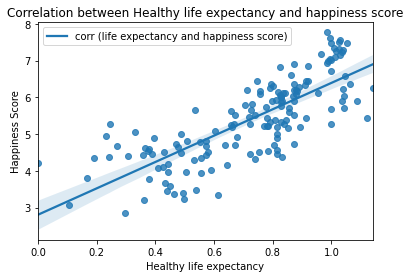

In [21]:
#Correlation between Happiness Score and life expectancy
new = df_final.filter(['Healthy life expectancy','Score'], axis=1)
fig = sns.regplot(x='Healthy life expectancy',y='Score',data=new)
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness Score")
plt.title("Correlation between Healthy life expectancy and happiness score")
plt.legend(labels=['corr (life expectancy and happiness score)'])